In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Importing necessary libraries

In [ ]:
import pandas as pd
import numpy as np
from shapely.geometry import Point, Polygon

### Reading lightning observation data for march 2020

In [ ]:
df0=pd.read_csv("/content/drive/MyDrive/Lightning data/LLN_data/2020/mar2020.csv")
df0.head()

,FlashID,PartitionSegmentCode,LightningTimeString,Latitude,Longitude,Height,StrokeType,Amplitude,StrokeSolution,Confidence,FlashDate
0,74138713,7,2020-03-01T23:59:58.642438232,21.97711,80.57147,18227,1,7160,NaN,100,2020-03-01
1,74138714,7,2020-03-02T00:00:24.462106049,-0.34840,95.85848,0,0,-128726,NaN,100,2020-03-02
2,74138715,7,2020-03-02T00:00:25.002499043,22.98442,81.77800,0,0,44678,NaN,100,2020-03-02
3,74138716,7,2020-03-02T00:00:34.087070941,20.64204,78.50189,18138,1,10189,NaN,100,2020-03-02
4,74138717,7,2020-03-02T00:00:35.971650719,-0.62349,96.06974,0,0,-114383,NaN,100,2020-03-02


### Pre-processing

In [ ]:
df0.drop('FlashID', inplace=True, axis=1)
df0.drop('FlashDate', inplace=True, axis=1)
df0.drop('PartitionSegmentCode',inplace=True, axis=1)
df0.drop('StrokeSolution', inplace=True, axis=1)
df0.drop('Confidence', inplace=True, axis=1)
df0.drop('StrokeType', inplace=True, axis=1)
df0.drop('Height', inplace=True, axis=1)

In [ ]:
li= []
from dateutil import parser

for i in df0.iloc[:,0].to_numpy():
  date_time = i.split('T')[0]+' '+i.split('T')[1].split('.')[0]
  time_obj = parser.parse(date_time)
  li.append(time_obj)

In [ ]:
df0['date_time'] = li
df0.drop('LightningTimeString', inplace=True, axis=1)

In [ ]:
df0=df0.loc[df0['date_time']>='2020-04-01 00:00:00']

In [ ]:
df0.head()

,Latitude,Longitude,Amplitude,date_time
2019650,31.79163,67.24160,-14171,2020-04-01 00:00:31
2019651,31.88922,67.17031,23323,2020-04-01 00:00:31
2019652,31.77215,67.11275,29274,2020-04-01 00:00:56
2019653,31.74081,67.23624,18349,2020-04-01 00:00:56
2019654,4.34680,73.53393,-123853,2020-04-01 00:01:18


### Reading lightning observation data for Apr and May 2020.

In [ ]:
df1=pd.read_csv("/content/drive/MyDrive/Lightning data/LLN_data/2020/apr2020.csv")
df1.head()

,FlashID,PartitionSegmentCode,LightningTimeString,Latitude,Longitude,Height,StrokeType,Amplitude,StrokeSolution,Confidence,FlashDate
0,76183318,8,2020-04-02T00:00:16.235648274,34.41934,72.12916,10205,1,-9950,NaN,100,2020-04-02
1,76183319,8,2020-04-02T00:00:41.193669736,33.03148,75.44821,0,0,59309,NaN,100,2020-04-02
2,76183320,8,2020-04-02T00:01:28.909732401,33.93032,75.01303,17960,1,18279,NaN,100,2020-04-02
3,76183321,8,2020-04-02T00:02:11.690391540,32.93003,75.27862,0,0,39239,NaN,100,2020-04-02
4,76183322,8,2020-04-02T00:02:32.816183030,32.81266,75.62406,6736,1,23975,NaN,100,2020-04-02


In [ ]:
df2=pd.read_csv("/content/drive/MyDrive/Lightning data/LLN_data/2020/may2020.csv")
df2.head()

,FlashID,PartitionSegmentCode,LightningTimeString,Latitude,Longitude,Height,StrokeType,Amplitude,StrokeSolution,Confidence,FlashDate
0,80821603,9,2020-05-02T00:00:26.418862819,15.93154,97.26604,0,0,-11840,NaN,100,2020-05-02
1,80821604,9,2020-05-02T00:00:33.079173982,15.48675,76.03181,17968,1,5146,NaN,100,2020-05-02
2,80821605,9,2020-05-02T00:00:33.392899692,16.00578,97.19707,0,0,-31580,NaN,100,2020-05-02
3,80821606,9,2020-05-02T00:00:32.404130518,15.46432,75.89272,15779,1,-2552,NaN,100,2020-05-02
4,80821607,9,2020-05-02T00:00:34.470631420,26.73217,87.63844,0,0,-5673,NaN,100,2020-05-02


### Further pre-processing

In [ ]:
 frames = [df1, df2]
 df = pd.concat(frames)

In [ ]:
df.drop('FlashID', inplace=True, axis=1)
df.drop('FlashDate', inplace=True, axis=1)
df.drop('PartitionSegmentCode',inplace=True, axis=1)
df.drop('StrokeSolution', inplace=True, axis=1)
df.drop('Confidence', inplace=True, axis=1)
df.drop('StrokeType', inplace=True, axis=1)
df.drop('Height', inplace=True, axis=1)

In [ ]:
li= []
from dateutil import parser

for i in df.iloc[:,0].to_numpy():
  date_time = i.split('T')[0]+' '+i.split('T')[1].split('.')[0]
  time_obj = parser.parse(date_time)
  li.append(time_obj)

In [ ]:
df['date_time'] = li
df.drop('LightningTimeString', inplace=True, axis=1)

In [ ]:
df.head()

,Latitude,Longitude,Amplitude,date_time
0,34.41934,72.12916,-9950,2020-04-02 00:00:16
1,33.03148,75.44821,59309,2020-04-02 00:00:41
2,33.93032,75.01303,18279,2020-04-02 00:01:28
3,32.93003,75.27862,39239,2020-04-02 00:02:11
4,32.81266,75.62406,23975,2020-04-02 00:02:32


In [ ]:
frames= [df0,df]
df = pd.concat(frames)

In [ ]:
df = df[(df["Latitude"].between(15,22))]

In [ ]:
df = df[(df["Longitude"].between(73,81))]

In [ ]:
df.sort_values('date_time')

,Latitude,Longitude,Amplitude,date_time
2021886,19.10997,79.34080,3721,2020-04-01 07:49:27
2021930,19.07978,79.39218,-2113,2020-04-01 07:51:05
2022080,19.08532,79.39542,-10759,2020-04-01 07:57:50
2022381,19.09099,79.27290,-7347,2020-04-01 08:08:43
2022454,19.15460,79.26694,-3566,2020-04-01 08:10:46
...,...,...,...,...
5187336,15.61192,80.33080,-5262,2020-06-01 23:59:34
5187343,15.68582,80.30896,-28120,2020-06-01 23:59:37
5187347,15.53403,80.40518,5623,2020-06-01 23:59:39
5187349,15.54733,80.23065,10714,2020-06-01 23:59:40


In [ ]:
df.head()

,Latitude,Longitude,Amplitude,date_time
2021886,19.10997,79.34080,3721,2020-04-01 07:49:27
2021930,19.07978,79.39218,-2113,2020-04-01 07:51:05
2022080,19.08532,79.39542,-10759,2020-04-01 07:57:50
2022381,19.09099,79.27290,-7347,2020-04-01 08:08:43
2022454,19.15460,79.26694,-3566,2020-04-01 08:10:46


### Creating 1 hour time intervals.

In [ ]:
from datetime import datetime, timedelta

def datetime_range(start, end, delta):
    current = start
    while current < end:
        yield current
        current += delta

dts = [dt.strftime('%Y-%m-%dT%H:%M:%S') for dt in 
       datetime_range(datetime(2020, 4, 1, 0), datetime(2020, 6, 1, 0), 
       timedelta(minutes=60))]

time_intervals = []

for i in dts:
  date_time = i.split('T')[0]+' '+i.split('T')[1]
  time_obj = parser.parse(date_time)
  time_intervals.append(time_obj)

print(time_intervals[0])
print(len(time_intervals))

2020-04-01 00:00:00
1464


In [ ]:
lons = np.arange(73,81,0.25)

In [ ]:
lats = np.arange(15,22,0.25)

In [ ]:
times = time_intervals  

In [ ]:
data = np.zeros((1464,29,33))

###Storing lightning observation data according to its occurrence over the specific grid.

In [ ]:
for i in range(len(df)):
  date_time = df.iloc[i,3]
  latitude,longitude,amplitude = df.iloc[i,0],df.iloc[i,1],df.iloc[i,2]
  index = 0
  for j in time_intervals:
    if(date_time<=j):
      break
    index+=1
  time_index = index-1
  lat_index,long_index = int(((latitude*10)-150)/2.5), int(((longitude*10)-730)/2.5)
  try:
    if abs(amplitude) > 0:
      data[time_index,lat_index,long_index] = 1
    else:
      data[time_index,lat_index,long_index] = 0
  except:
    print(latitude,longitude)
    break

### Reading the meteorological data

In [ ]:
data.shape

(1464, 29, 33)

In [ ]:
import xarray as xr

In [ ]:
ds_disk1 = xr.open_dataset("/content/drive/MyDrive/Lightning data/ERA-5/Single_Level/adaptor.mars.internal-1630659189.4085906-28497-1-6212baae-3c43-4888-ac63-017fc223b902.nc")

In [ ]:
ds_disk1

<xarray.Dataset>
Dimensions:    (latitude: 29, longitude: 33, time: 1464)
Coordinates:
  * longitude  (longitude) float32 73.0 73.25 73.5 73.75 ... 80.5 80.75 81.0
  * latitude   (latitude) float32 22.0 21.75 21.5 21.25 ... 15.5 15.25 15.0
  * time       (time) datetime64[ns] 2020-04-01 ... 2020-05-31T23:00:00
Data variables:
    cape       (time, latitude, longitude) float32 ...
    p80.162    (time, latitude, longitude) float32 ...
    p79.162    (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2021-09-03 08:53:26 GMT by grib_to_netcdf-2.20.0: /opt/ecmw...

In [ ]:
ds_disk1.cape.values.shape

(1464, 29, 33)

In [ ]:
ds_disk2 = xr.open_dataset("/content/drive/MyDrive/Lightning data/ERA-5/Pressure_Levels/2020.nc")

In [ ]:
ds_disk2

<xarray.Dataset>
Dimensions:    (latitude: 29, level: 16, longitude: 33, time: 1464)
Coordinates:
  * longitude  (longitude) float32 73.0 73.25 73.5 73.75 ... 80.5 80.75 81.0
  * latitude   (latitude) float32 22.0 21.75 21.5 21.25 ... 15.5 15.25 15.0
  * level      (level) int32 500 550 600 650 700 750 ... 900 925 950 975 1000
  * time       (time) datetime64[ns] 2020-04-01 ... 2020-05-31T23:00:00
Data variables:
    r          (time, level, latitude, longitude) float32 ...
    clwc       (time, level, latitude, longitude) float32 ...
    t          (time, level, latitude, longitude) float32 ...
    w          (time, level, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2021-09-03 10:10:29 GMT by grib_to_netcdf-2.20.0: /opt/ecmw...

### Storing lightning observation data and meteorological data in a xarray dataset.

In [ ]:
times = ds_disk2.time.values
lon = ds_disk2.longitude.values
lat = ds_disk2.latitude.values
pressure = ds_disk2.level.values

In [ ]:
cape = ds_disk1.cape.values
p80_162 = ds_disk1['p80.162'].values
p79_162 = ds_disk1['p79.162'].values

In [ ]:
r = ds_disk2.r.values
clwc = ds_disk2.clwc.values
t = ds_disk2.t.values
w = ds_disk2.w.values

In [ ]:
data_2020 = xr.Dataset(
    {
        "r":(          
          ("time", "level", "latitude", "longitude"),
          r,
          dict(
            units = '%',
            long_name= 'Relative humidity',
            standard_name= 'relative_humidity',
            ),
        ),
        "clwc":(
          ("time", "level", "latitude", "longitude"),
          clwc,
          dict(
            units = 'kg kg**-1',
            long_name= 'Specific cloud liquid water content',
            ),
        ),
        "t":(
          ("time", "level", "latitude", "longitude"),
          t,
          dict(
            units = 'K',
            long_name= 'Temperature',
            standard_name = 'air_temperature',
            ),  
        ),
        "w":(
          ("time", "level", "latitude", "longitude"),
          w,  
          dict(
            units = 'Pa s**-1',
            long_name= 'Vertical velocity',
            standard_name = 'lagrangian_tendency_of_air_pressure',
            ), 
        ),
        "cape":(
            ("time", "latitude", "longitude"),
            cape,
            dict(
            units = 'J kg**-1',
            long_name= 'Convective available potential energy',
            ),
        ),
       "p80.162":(
           ("time", "latitude", "longitude"),
           p80_162,
           dict(
            units = 'kg m**-2 s**-1',
            long_name= 'Vertical integral of divergence of cloud frozen water flux',
            ),
       ),
       "p79.162":(
           ("time", "latitude", "longitude"),
           p79_162,
           dict(
            units = 'kg m**-2 s**-1',
            long_name= 'Vertical integral of divergence of cloud liquid water flux',
            ),
       ),
      "Amplitude":(
           ("time", "latitude", "longitude"),
           data,
           dict(
            units = 'Amp',
            long_name= 'Amplitude of lightning',
            ),
       ),
    },
    coords={"longitude": lon, "latitude": lat, "level": pressure ,"time": times},
    attrs=dict(description="Parameters affecting lightning data."),
)

In [ ]:
data_2020

<xarray.Dataset>
Dimensions:    (latitude: 29, level: 16, longitude: 33, time: 1464)
Coordinates:
  * longitude  (longitude) float32 73.0 73.25 73.5 73.75 ... 80.5 80.75 81.0
  * latitude   (latitude) float32 22.0 21.75 21.5 21.25 ... 15.5 15.25 15.0
  * level      (level) int32 500 550 600 650 700 750 ... 900 925 950 975 1000
  * time       (time) datetime64[ns] 2020-04-01 ... 2020-05-31T23:00:00
Data variables:
    r          (time, level, latitude, longitude) float32 21.81 21.37 ... 81.08
    clwc       (time, level, latitude, longitude) float32 -5.821e-11 ... -5.8...
    t          (time, level, latitude, longitude) float32 264.9 264.8 ... 302.2
    w          (time, level, latitude, longitude) float32 -0.03047 ... 0.01822
    cape       (time, latitude, longitude) float32 0.0002441 ... 2.999e+03
    p80.162    (time, latitude, longitude) float32 3.824e-07 ... 2.861e-09
    p79.162    (time, latitude, longitude) float32 2.89e-07 ... -8.152e-07
    Amplitude  (time, latitude, longitude) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
Attributes:
    description:  Parameters affecting lightning data.

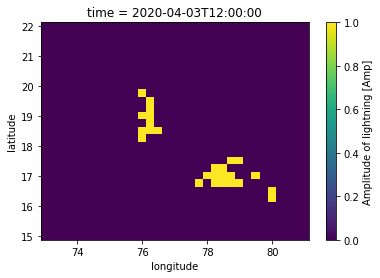

In [ ]:
plot2d = data_2020.Amplitude.isel(time=60)
plot2d.plot()

### Storing the data as netcdf file.

In [ ]:
data_2020.to_netcdf('/content/drive/MyDrive/Lightning data/S13/data2020.nc')